## Support Vector Machines

## Que: Implement a SVM model to classify Size Categories of burned area in forest

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

## Importing the Data

In [2]:
forest_data = pd.read_csv('/content/forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [3]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
forest_data.loc[forest_data.duplicated(),:]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [5]:
forest_data = forest_data.drop_duplicates().reset_index()

In [6]:
forest_data.loc[forest_data.duplicated(),:]

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [7]:
forest_data.dtypes

index              int64
month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [8]:
forest_data['month']=forest_data['month'].astype('category')
forest_data['day']=forest_data['day'].astype('category')
forest_data['size_category']=forest_data['size_category'].astype('category')

In [9]:
forest_data.dtypes

index               int64
month            category
day              category
FFMC              float64
DMC               float64
DC                float64
ISI               float64
temp              float64
RH                  int64
wind              float64
rain              float64
area              float64
dayfri              int64
daymon              int64
daysat              int64
daysun              int64
daythu              int64
daytue              int64
daywed              int64
monthapr            int64
monthaug            int64
monthdec            int64
monthfeb            int64
monthjan            int64
monthjul            int64
monthjun            int64
monthmar            int64
monthmay            int64
monthnov            int64
monthoct            int64
monthsep            int64
size_category    category
dtype: object

## Data Preparation

In [10]:
forest_data_d1= forest_data.iloc[:,1:12]
forest_data_d1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [11]:
forest_data_d1.dtypes

month    category
day      category
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
area      float64
dtype: object

In [12]:
forest_data_d1['month'] = forest_data_d1['month'].cat.codes
forest_data_d1['day'] = forest_data_d1['day'].cat.codes
forest_data['size_category'] = forest_data['size_category'].cat.codes
forest_data_d1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [13]:
st_model= StandardScaler()

In [14]:
list(forest_data_d1.columns.values)

['month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area']

In [15]:
scaler_data = st_model.fit_transform(forest_data_d1)
forest_data_d2 = pd.DataFrame(scaler_data,columns=list(forest_data_d1.columns))
forest_data_d2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.271858,-1.424495,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791
1,0.958019,1.178046,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791
2,0.958019,-0.383478,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791
3,0.271858,-1.424495,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791
4,0.271858,0.137030,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791
...,...,...,...,...,...,...,...,...,...,...,...
504,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277
505,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559
506,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608
507,-1.100464,-0.383478,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791


In [16]:
X= forest_data_d2
y=forest_data['size_category']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=6)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((407, 11), (102, 11), (407,), (102,))

## Model Building

In [18]:
svm_model = SVC(kernel='linear')

In [19]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

## Model Testing

In [20]:
y_pred_train = svm_model.predict(X_train)

In [21]:
y_pred_test = svm_model.predict(X_test)

## Model Evaluation

In [22]:
accuracy_score(y_train,y_pred_train)

0.9090909090909091

In [23]:
confusion_matrix(y_train,y_pred_train)

array([[ 66,  37],
       [  0, 304]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


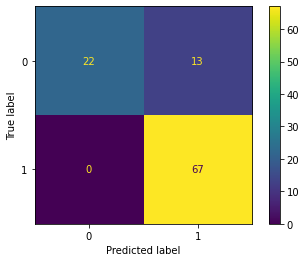

In [24]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [25]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78       103
           1       0.89      1.00      0.94       304

    accuracy                           0.91       407
   macro avg       0.95      0.82      0.86       407
weighted avg       0.92      0.91      0.90       407



In [26]:
accuracy_score(y_test,y_pred_test)

0.8725490196078431

In [27]:
confusion_matrix(y_test,y_pred_test)

array([[22, 13],
       [ 0, 67]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


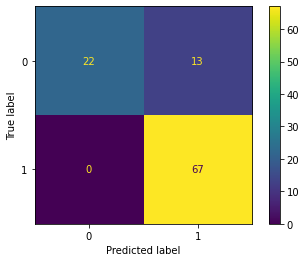

In [28]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [29]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77        35
           1       0.84      1.00      0.91        67

    accuracy                           0.87       102
   macro avg       0.92      0.81      0.84       102
weighted avg       0.89      0.87      0.86       102



## Model Improvement 1

In [30]:
svm_model = SVC(kernel='rbf',gamma= 1, C= 0.1)

In [31]:
svm_model.fit(X_train,y_train)

SVC(C=0.1, gamma=1)

## Model Testing

In [32]:
y_pred_train = svm_model.predict(X_train)

In [33]:
y_pred_test = svm_model.predict(X_test)

## Model Evaluation

In [34]:
accuracy_score(y_train,y_pred_train)

0.7469287469287469

In [35]:
confusion_matrix(y_train,y_pred_train)

array([[  0, 103],
       [  0, 304]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


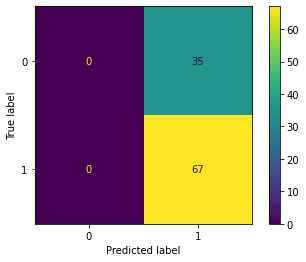

In [36]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [37]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.75      1.00      0.86       304

    accuracy                           0.75       407
   macro avg       0.37      0.50      0.43       407
weighted avg       0.56      0.75      0.64       407



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
accuracy_score(y_test,y_pred_test)

0.6568627450980392

In [39]:
confusion_matrix(y_test,y_pred_test)

array([[ 0, 35],
       [ 0, 67]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


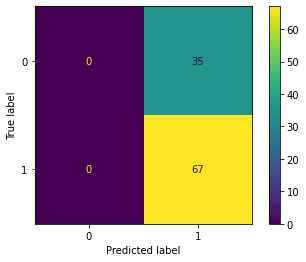

In [40]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [41]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.66      1.00      0.79        67

    accuracy                           0.66       102
   macro avg       0.33      0.50      0.40       102
weighted avg       0.43      0.66      0.52       102



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Improvement 2

In [42]:
svm_model = SVC(kernel='poly',gamma= 1, C= 0.1)

In [43]:
svm_model.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='poly')

## Model Testing

In [44]:
y_pred_train = svm_model.predict(X_train)

In [45]:
y_pred_test = svm_model.predict(X_test)

## Model Evaluation

In [46]:
accuracy_score(y_train,y_pred_train)

0.9754299754299754

In [47]:
confusion_matrix(y_train,y_pred_train)

array([[ 93,  10],
       [  0, 304]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


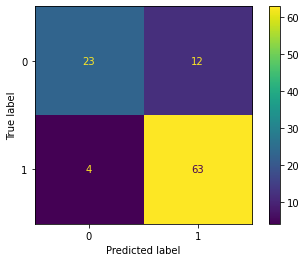

In [48]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [49]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       103
           1       0.97      1.00      0.98       304

    accuracy                           0.98       407
   macro avg       0.98      0.95      0.97       407
weighted avg       0.98      0.98      0.98       407



In [50]:
accuracy_score(y_test,y_pred_test)

0.8431372549019608

In [51]:
confusion_matrix(y_test,y_pred_test)

array([[23, 12],
       [ 4, 63]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


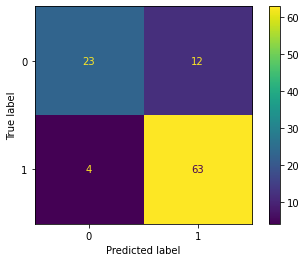

In [52]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [53]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74        35
           1       0.84      0.94      0.89        67

    accuracy                           0.84       102
   macro avg       0.85      0.80      0.81       102
weighted avg       0.84      0.84      0.84       102



## Model Improvement 3

In [54]:
svm_model = SVC(kernel='poly',gamma= 0.8, C= 0.7)

In [55]:
svm_model.fit(X_train,y_train)

SVC(C=0.7, gamma=0.8, kernel='poly')

## Model Testing

In [56]:
y_pred_train = svm_model.predict(X_train)

In [57]:
y_pred_test = svm_model.predict(X_test)

## Model Evaluation

In [58]:
accuracy_score(y_train,y_pred_train)

0.995085995085995

In [59]:
confusion_matrix(y_train,y_pred_train)

array([[101,   2],
       [  0, 304]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


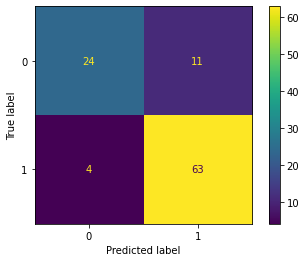

In [60]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [61]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       103
           1       0.99      1.00      1.00       304

    accuracy                           1.00       407
   macro avg       1.00      0.99      0.99       407
weighted avg       1.00      1.00      1.00       407



In [62]:
accuracy_score(y_test,y_pred_test)

0.8529411764705882

In [63]:
confusion_matrix(y_test,y_pred_test)

array([[24, 11],
       [ 4, 63]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


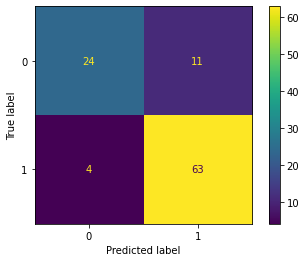

In [64]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [65]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76        35
           1       0.85      0.94      0.89        67

    accuracy                           0.85       102
   macro avg       0.85      0.81      0.83       102
weighted avg       0.85      0.85      0.85       102



Model 3 Is having final 99% Training Accuracy and 85% Testing Accuracy

## Model Deployment

In [66]:
from pickle import dump

In [67]:
dump(svm_model, open('Support_Vector_Machines_Forest_Fires','wb'))

In [68]:
from pickle import load

In [69]:
linear_read_model = load(open('/content/Support_Vector_Machines_Forest_Fires','rb'))

In [70]:
svm_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int8)